In [95]:
# import requirements
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, linregress

NOVEL_DIRECTORY = './data/novels/'

In [96]:
# code to process event distribution
def compute_event_distribution(filename: str) -> dict[str, float]:
    """Computes the events/tokens ration and the tokens/events ratio for novel"""
    
    # count amount of tokens in the text
    with open(NOVEL_DIRECTORY + filename + '.tok', 'r', encoding='UTF-8') as inp:
        token_count = sum([len(line.split(' ')) for line in inp.readlines()])


    # count amount of events in the text
    event_count = {'realis': 0, 'non-realis': 0}
    with open(NOVEL_DIRECTORY + filename + '.predictions.pickle', 'rb') as inp:
        events: list[list[dict]] = pickle.load(inp)

    for line in events:
        for event in line:
            match event['entity']: # event type
                case 'realis':
                    event_count['realis'] += 1
                case 'nonrealis':
                    event_count['non-realis'] += 1
                    
    events_total = event_count['realis'] + event_count['non-realis']
    
    return {
        'tokens': token_count,
        'realis events': event_count['realis'],
        'non-realis events': event_count['non-realis'],
        'all_events': events_total,
        'realis/non-realis ratio': event_count['realis']/event_count['non-realis'], # higher score -> relatively more realis events
        'realis/tokens ratio': event_count['realis']/token_count,
        'non-realis/tokens ratio': event_count['non-realis']/token_count,
        'all_events/tokens ratio': events_total/token_count,
        'tokens/realis distance': token_count/event_count['realis'],
        'tokens/non-realis distance': token_count/event_count['non-realis'],
        'tokens/all_events distance': token_count/events_total,
    }


def compute_events_distribution(filenames: list[str]) -> pd.DataFrame:
    """Of all novels in filenames, compute events/tokens and tokens/events"""

    event_distribution = {}

    for filename in filenames:
        event_distribution[filename] = compute_event_distribution(filename)

    return pd.DataFrame.from_dict(event_distribution, orient='index')
    

## LOAD DATA

In [97]:
# create scores for canonical novels
with open(NOVEL_DIRECTORY + '_canonical_novels_large.txt', 'r', encoding='UTF-8') as inp:
    filenames = [filename.rstrip() for filename in inp.readlines()]

canonical_df = compute_events_distribution(filenames)

# canonical_df.mean(axis=0)

canonical_df

,tokens,realis events,non-realis events,all_events,realis/non-realis ratio,realis/tokens ratio,non-realis/tokens ratio,all_events/tokens ratio,tokens/realis distance,tokens/non-realis distance,tokens/all_events distance
scha033uits01_01,72959,8759,2130,10889,4.112207,0.120054,0.029194,0.149248,8.329604,34.253052,6.700248
sabb002aant01_01,46383,5580,1306,6886,4.272588,0.120303,0.028157,0.148460,8.312366,35.515314,6.735841
wess008cell02_01,33802,4440,919,5359,4.831338,0.131353,0.027188,0.158541,7.613063,36.781284,6.307520
thir001scho01_01,65671,8304,1131,9435,7.342175,0.126449,0.017222,0.143671,7.908357,58.064545,6.960360
quer002jord03_01,167863,22393,4467,26860,5.012984,0.133400,0.026611,0.160011,7.496226,37.578464,6.249553
...,...,...,...,...,...,...,...,...,...,...,...
bord001rood01_01,55670,6673,1897,8570,3.517659,0.119867,0.034076,0.153943,8.342575,29.346336,6.495916
waze001vlaa01_01,77057,8080,2552,10632,3.166144,0.104857,0.033118,0.137976,9.536757,30.194749,7.247649
slau001verb01_01,58201,7533,2343,9876,3.215109,0.129431,0.040257,0.169688,7.726138,24.840376,5.893175
vuyk001laat01_01,39978,5305,629,5934,8.434022,0.132698,0.015734,0.148432,7.535910,63.558029,6.737108


In [98]:
# create scores for non-canonical novels
with open(NOVEL_DIRECTORY + '_non_canonical_novels_large.txt', 'r', encoding='UTF-8') as inp:
    filenames = [filename.rstrip() for filename in inp.readlines()]

non_canonical_df = compute_events_distribution(filenames)

# non_canonical_df.mean(axis=0)

non_canonical_df

,tokens,realis events,non-realis events,all_events,realis/non-realis ratio,realis/tokens ratio,non-realis/tokens ratio,all_events/tokens ratio,tokens/realis distance,tokens/non-realis distance,tokens/all_events distance
goud005jank01_01,150415,13758,5588,19346,2.462062,0.091467,0.037151,0.128617,10.932912,26.917502,7.774992
verm043gehe01_01,80609,9536,2527,12063,3.773645,0.118299,0.031349,0.149648,8.453125,31.899090,6.682334
treg001ramp01_01,78556,8712,2047,10759,4.255984,0.110902,0.026058,0.136960,9.016988,38.376160,7.301422
veer004malt01_01,141546,14408,6160,20568,2.338961,0.101790,0.043519,0.145310,9.824125,22.978247,6.881855
schr014kron02_01,119768,12978,5174,18152,2.508311,0.108359,0.043200,0.151560,9.228541,23.148048,6.598061
...,...,...,...,...,...,...,...,...,...,...,...
kort010mens01_01,72518,8068,2826,10894,2.854919,0.111255,0.038970,0.150225,8.988349,25.661005,6.656692
schi018kapi05_01,87750,9886,3128,13014,3.160486,0.112661,0.035647,0.148308,8.876189,28.053069,6.742739
oliv001quas02_01,79962,5934,2242,8176,2.646744,0.074210,0.028038,0.102249,13.475228,35.665477,9.780088
bour001vier01_01,12350,1517,359,1876,4.225627,0.122834,0.029069,0.151903,8.141068,34.401114,6.583156


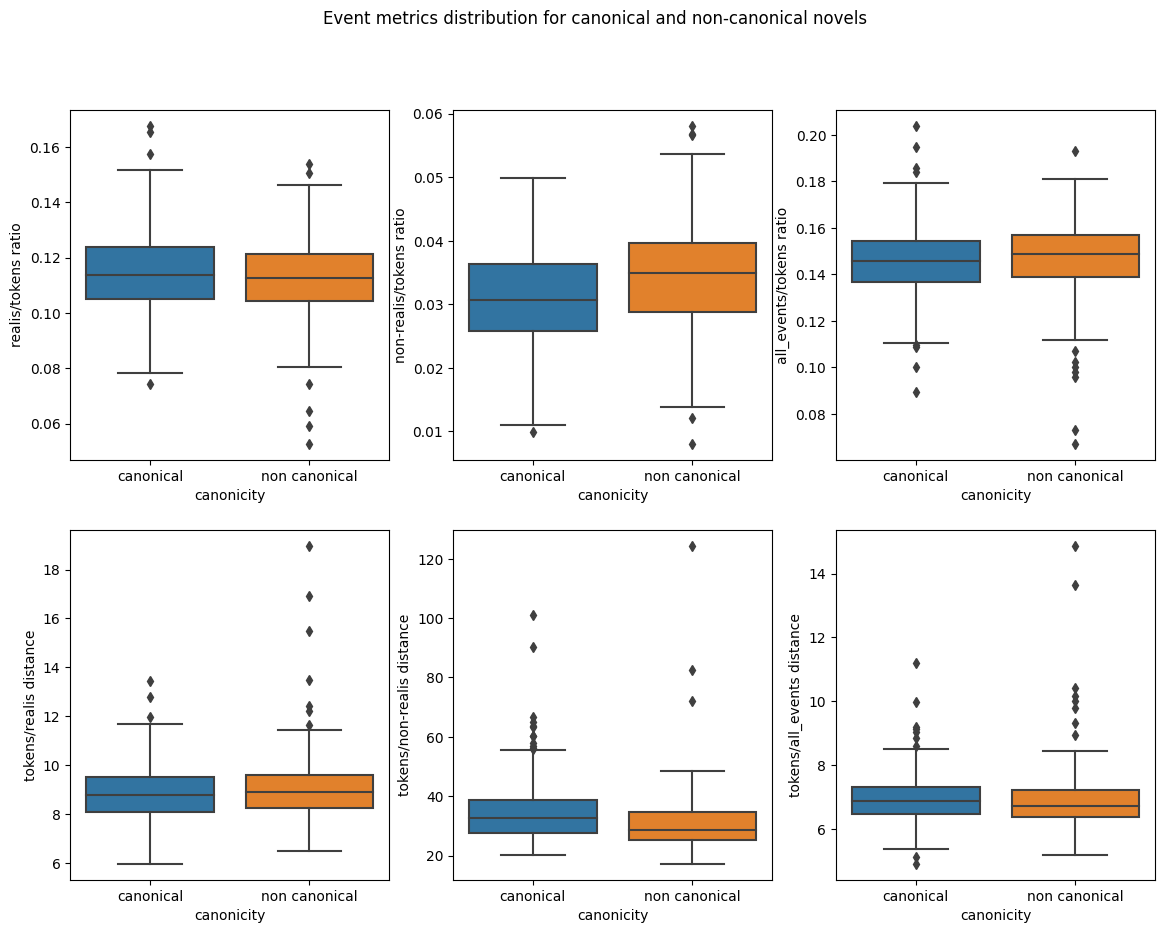

In [99]:
# print boxplot for all metrics except realis/non-realis ratio
combined_df = pd.concat([canonical_df.assign(canonicity='canonical'), non_canonical_df.assign(canonicity='non canonical')])

rows = 2
columns = 3
fig, ax = plt.subplots(rows,columns)
fig.set_size_inches(14, 10)
fig.suptitle('Event metrics distribution for canonical and non-canonical novels')

plot_index = 5
for row_idx in range(rows):
    for column_idx in range(columns):
        sns.boxplot(x='canonicity', y=combined_df.columns[plot_index], data=combined_df, ax=ax[row_idx][column_idx])  
        plot_index += 1

## RATIO & DISTANCE CORRELATION

In [100]:
# compute correlation
ALPHA = 0.05
correlation_df = pd.concat([canonical_df.assign(canonicity=1), non_canonical_df.assign(canonicity=0)]).iloc[:,4:]

for column in correlation_df.iloc[:,1:-1]:
      correlation, p_value = pointbiserialr(correlation_df[column], correlation_df['canonicity'])
      print(f'{column + " correlation:":<39} {"-" if correlation < 0 else " "}'
            f'{abs(correlation):.4f} | {column + " p-value:":<35} {p_value:.4f}', end='')
      print(' -> significant' if p_value <= ALPHA/2 else '')

realis/tokens ratio correlation:         0.1148 | realis/tokens ratio p-value:        0.0735
non-realis/tokens ratio correlation:    -0.2354 | non-realis/tokens ratio p-value:    0.0002 -> significant
all_events/tokens ratio correlation:    -0.0115 | all_events/tokens ratio p-value:    0.8577
tokens/realis distance correlation:     -0.1198 | tokens/realis distance p-value:     0.0616
tokens/non-realis distance correlation:  0.1764 | tokens/non-realis distance p-value: 0.0057 -> significant
tokens/all_events distance correlation: -0.0177 | tokens/all_events distance p-value: 0.7836


## RATIO & DISTANCE REGRESSION

In [101]:
# create df to compute and plot regression analysis
metadata_df = pd.read_csv('./data/novels/_metadata.tsv', sep='\t')
regression_df = pd.concat([canonical_df.assign(canonicity='canonical'), non_canonical_df.assign(canonicity='non_canonical')])

regression_df = regression_df.reset_index()
regression_df = regression_df.rename(columns={'index': 'DBNLti_id'})
regression_df['DBNLti_id'] = regression_df['DBNLti_id'].str[:-3]

regression_df = regression_df.merge(metadata_df[['DBNLti_id', 'DBNLSecRefsTitle']], on='DBNLti_id', how='left')
regression_df=regression_df.reindex(columns=list(regression_df.columns[:-2]) + ['DBNLSecRefsTitle', 'canonicity'])

regression_df.head()

,DBNLti_id,tokens,realis events,non-realis events,all_events,realis/non-realis ratio,realis/tokens ratio,non-realis/tokens ratio,all_events/tokens ratio,tokens/realis distance,tokens/non-realis distance,tokens/all_events distance,DBNLSecRefsTitle,canonicity
0,scha033uits01,72959,8759,2130,10889,4.112207,0.120054,0.029194,0.149248,8.329604,34.253052,6.700248,3,canonical
1,sabb002aant01,46383,5580,1306,6886,4.272588,0.120303,0.028157,0.148460,8.312366,35.515314,6.735841,3,canonical
2,wess008cell02,33802,4440,919,5359,4.831338,0.131353,0.027188,0.158541,7.613063,36.781284,6.307520,3,canonical
3,thir001scho01,65671,8304,1131,9435,7.342175,0.126449,0.017222,0.143671,7.908357,58.064545,6.960360,3,canonical
4,quer002jord03,167863,22393,4467,26860,5.012984,0.133400,0.026611,0.160011,7.496226,37.578464,6.249553,3,canonical


In [102]:
# compute regression
ALPHA = 0.05

for column in regression_df.iloc[:,6:-2]:
    results = linregress(x=regression_df[column], y=regression_df['DBNLSecRefsTitle'], alternative='two-sided')
    slope, p_value = [results[idx] for idx in [0, 3]]
    print(f'{column + " slope:":<33} {"-" if slope < 0 else " "}'
          f'{abs(slope):<8.4f} | {column + " p-value:":<35} {p_value:.4f}', end='')
    print(' -> significant' if p_value <= ALPHA/2 else '')

realis/tokens ratio slope:         23.7923  | realis/tokens ratio p-value:        0.0194 -> significant
non-realis/tokens ratio slope:    -61.6952  | non-realis/tokens ratio p-value:    0.0009 -> significant
all_events/tokens ratio slope:     4.2757   | all_events/tokens ratio p-value:    0.6338
tokens/realis distance slope:     -0.2395   | tokens/realis distance p-value:     0.0277
tokens/non-realis distance slope:  0.0320   | tokens/non-realis distance p-value: 0.0114 -> significant
tokens/all_events distance slope: -0.1100   | tokens/all_events distance p-value: 0.4561


/mnt/c/Users/bbjov/My Documents/informatiekunde/bachelor_scriptie/event-prediction/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


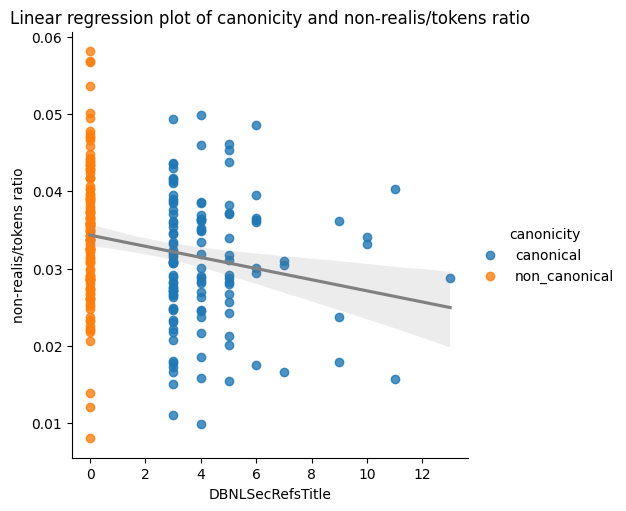

In [126]:
# plot regression for events ratio
column = 'non-realis/tokens ratio'
g = sns.lmplot(x='DBNLSecRefsTitle', y=column, hue='canonicity', data=regression_df, fit_reg=False)
sns.regplot(x='DBNLSecRefsTitle', y=column, data=regression_df, scatter=False, ax=g.axes[0, 0], line_kws={'color': 'grey'})
plt.title(f'Linear regression plot of canonicity and {column}')
plt.show()

/mnt/c/Users/bbjov/My Documents/informatiekunde/bachelor_scriptie/event-prediction/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


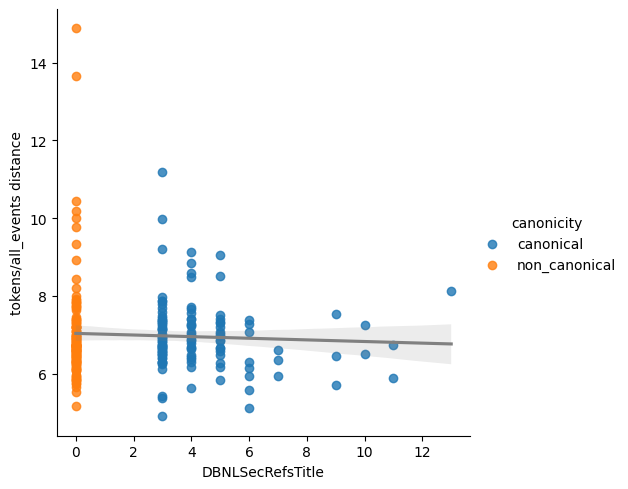

In [104]:
# plot regression for events distance
g = sns.lmplot(x='DBNLSecRefsTitle', y='tokens/all_events distance', hue='canonicity', data=regression_df, fit_reg=False)
sns.regplot(x='DBNLSecRefsTitle', y='tokens/all_events distance', data=regression_df, scatter=False, ax=g.axes[0, 0], line_kws={'color': 'grey'})
plt.show()

## REALIS/NON-REALIS RATIO

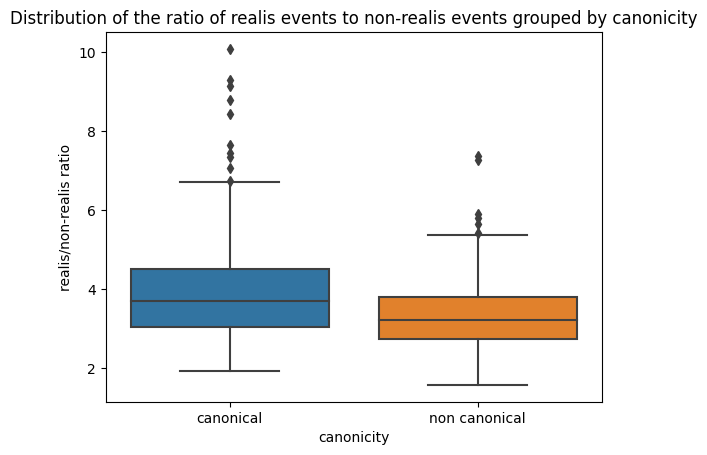

In [119]:
# boxplot for realis/non-realis ratio
sns.boxplot(x='canonicity', y='realis/non-realis ratio', data=combined_df)
plt.title('Distribution of the ratio of realis events to non-realis events grouped by canonicity')
plt.show()  

In [106]:
# compute realis/non-realis ratio correlation

correlation, p_value = pointbiserialr(correlation_df['realis/non-realis ratio'], correlation_df['canonicity'])
print(f'{"realis/non-realis ratio correlation:":<39} {"-" if correlation < 0 else " "}'
    f'{abs(correlation):.4f} | {"realis/non-realis ratio p-value:":<35} {p_value:.4f}', end='')
print(' -> significant' if p_value <= ALPHA/2 else '')

realis/non-realis ratio correlation:     0.2556 | realis/non-realis ratio p-value:    0.0001 -> significant


In [116]:
# compute realis/non-realis regression
results = linregress(x=regression_df['realis/non-realis ratio'], y=regression_df['DBNLSecRefsTitle'], alternative='two-sided')
slope, p_value = [results[idx] for idx in [0, 3]]
print(f'{"realis/non-realis ratio slope:":<33} {"-" if slope < 0 else " "}'
        f'{abs(slope):<8.4f} | {"realis/non-realis ratio p-value:":<35} {p_value:.4f}', end='')
print(' -> significant' if p_value <= ALPHA/2 else '')

realis/non-realis ratio slope:     0.4848   | realis/non-realis ratio p-value:    0.0000 -> significant


/mnt/c/Users/bbjov/My Documents/informatiekunde/bachelor_scriptie/event-prediction/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


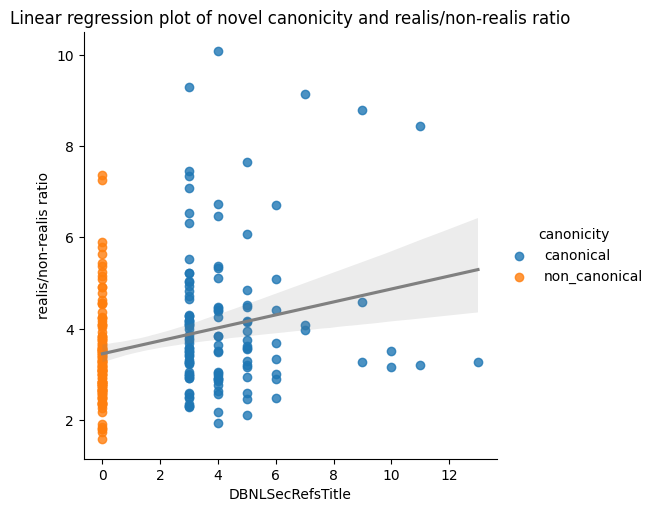

In [124]:
# plot regression graph for realis/non-realis regression
g = sns.lmplot(x='DBNLSecRefsTitle', y='realis/non-realis ratio', hue='canonicity', data=regression_df, fit_reg=False)
sns.regplot(x='DBNLSecRefsTitle', y='realis/non-realis ratio', data=regression_df, scatter=False, ax=g.axes[0, 0], line_kws={'color': 'grey'})
plt.title('Linear regression plot of novel canonicity and realis/non-realis ratio')
plt.show()